In [2]:
#Question 1
#The data set describes indiviudal pokemon, their generation, elemental types along numerical values representing their stats. 
#The higher the number in the specific category the better the value.
#Which pokemon type has the most pokemon?
#which pokemon type has the highest average speed?
#Which pokemon type has the highest total defense?
#Which pokemon type has the highest total attack?
#Which pokemon generation has the most pokemon out of all of them?
https://www.kaggle.com/datasets/jaidalmotra/pokemon-dataset
https://github.com/qcooper2/QuinceCooperRepository

<class 'SyntaxError'>: invalid syntax (<ipython-input-2-416dad97d8dc>, line 9)

In [3]:
#Question 2
import pandas as pd
import numpy as np
df = pd.read_csv('pokemon.csv')
df = df.dropna(subset=['type2'])

df = df.drop_duplicates()

print(df.dtypes)

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Unique values in {col}: {df[col].unique()}")

numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
print(df.describe())

<ipython-input-3-1f283e6a203d>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


number         int64
name          object
type1         object
type2         object
total          int64
hp             int64
attack         int64
defense        int64
sp_attack      int64
sp_defense     int64
speed          int64
generation     int64
legendary       bool
dtype: object
Unique values in name: ['Bulbasaur' 'Ivysaur' 'Venusaur' 'Mega Venusaur' 'Gigantamax Venusaur'
 'Charizard' 'Mega Charizard X' 'Mega Charizard Y' 'Gigantamax Charizard'
 'Gigantamax Blasoise' 'Butterfree' 'Gigantamax Butterfree' 'Weedle'
 'Kakuna' 'Beedrill' 'Mega Beedrill' 'Pidgey' 'Pidgeotto' 'Pidgeot'
 'Mega Pidgeot' 'Alolan Rattata' 'Alolan Raticate' 'Spearow' 'Fearow'
 'Alolan Raichu' 'Alolan Sandshrew' 'Alolan Sandslash' 'Nidoqueen'
 'Nidoking' 'Alolan Ninetales' 'Jigglypuff' 'Wigglytuff' 'Zubat' 'Golbat'
 'Oddish' 'Gloom' 'Vileplume' 'Paras' 'Parasect' 'Venonat' 'Venomoth'
 'Alolan Diglett' 'Alolan Dugtrio' 'Poliwrath' 'Bellsprout' 'Weepinbell'
 'Victreebel' 'Tentacool' 'Tentacruel' 'Geodude' 'Alo

Flying       117
Water         84
Grass         79
Psychic       77
Bug           71
Poison        65
Dark          61
Ground        59
Rock          57
Dragon        57
Steel         56
Normal        55
Fire          50
Ghost         50
Fairy         47
Fighting      45
Electric      40
Ice           37
Blastoise      1
Name: count, dtype: int64


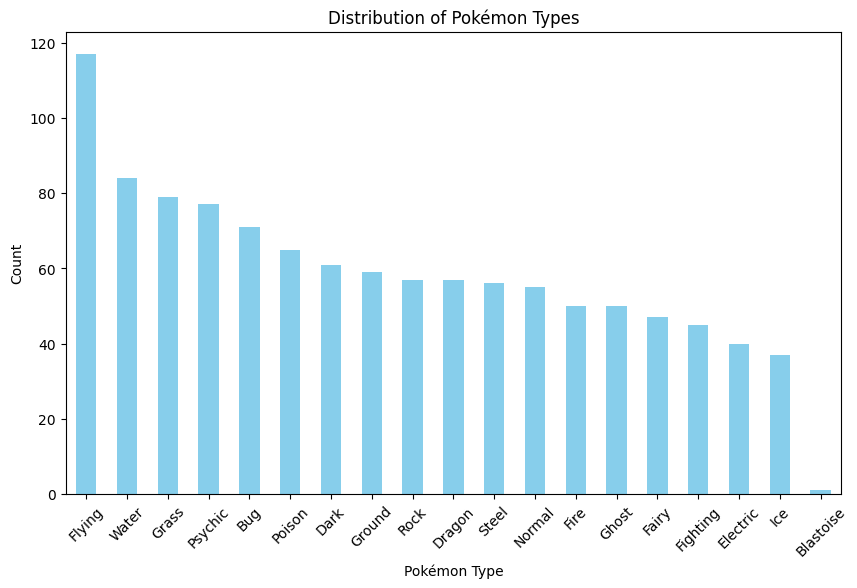

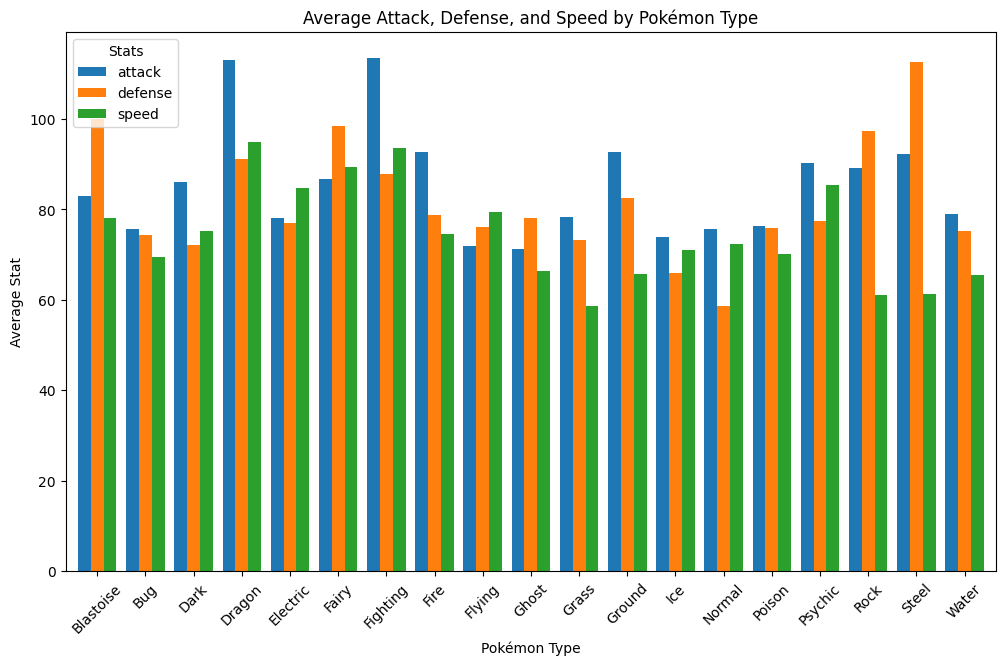

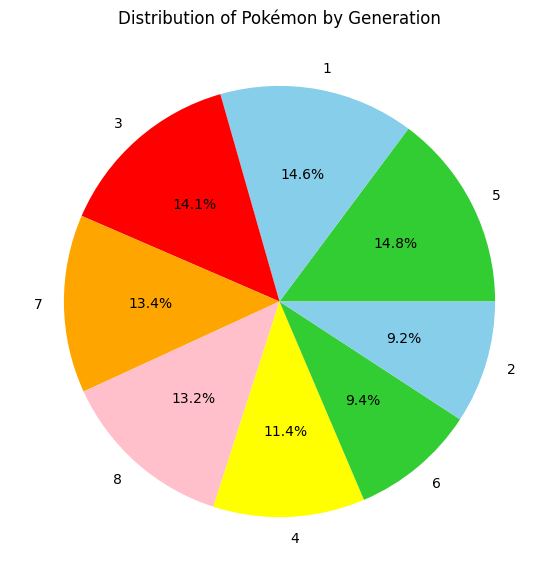

In [8]:
#Question 3
import matplotlib.pyplot as plt
type_counts = pd.concat([df['type1'], df['type2']]).value_counts()

print(type_counts)
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Pokémon Types')
plt.xlabel('Pokémon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

average_stats = df.pivot_table(values=['attack', 'defense', 'speed'], index='type1', aggfunc='mean')

average_stats.plot(kind='bar', figsize=(12, 7), width=0.8)
plt.title('Average Attack, Defense, and Speed by Pokémon Type')
plt.xlabel('Pokémon Type')
plt.ylabel('Average Stat')
plt.xticks(rotation=45)
plt.legend(title='Stats', loc='upper left')
plt.show()

generation_counts = df['generation'].value_counts()

plt.figure(figsize=(7, 7))
generation_counts.plot(kind='pie', autopct='%1.1f%%', colors=['limegreen','skyblue','red','orange','pink','yellow'])
plt.title('Distribution of Pokémon by Generation')
plt.ylabel('')
plt.show()

In [5]:
#Question 3 / 4
#Based on the results majority of pokemon out of all the generations are flying types with water and grass following right behind it.
#Fighting and Dark type pokemon have the highest average attack stat value.
#Steel type pokemon have the highest average defense.
#Dragon type pokemon have the highest average speed.
#The fifth generation of pokemon has the most pokemon.
#I could have further and explored the pokemon with two different types instead of only including the ones with one elemental type.